In [274]:
from keras.models import Sequential,load_model
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout,BatchNormalization,LeakyReLU,Convolution2D
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
%matplotlib inline 

In [338]:
data = pd.read_csv("training.csv")
data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [239]:
len(val_data.columns[:-1])

1

In [ ]:
data.columns[-1:]

7049

In [ ]:
image = []
for i in range(len(data['Image'])):
  img = data['Image'][i].split(' ')
  image.append(img)

In [289]:
image = np.asarray(image,dtype=np.uint8)
image = image.reshape(-1,96,96,1)

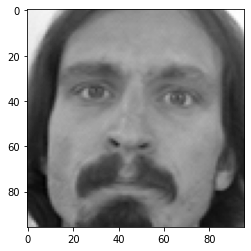

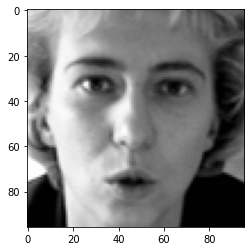

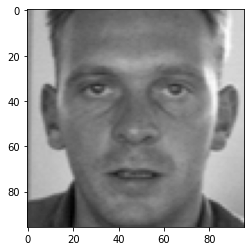

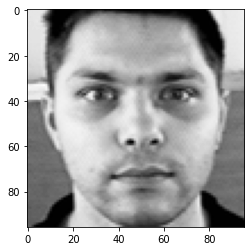

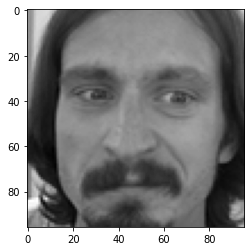

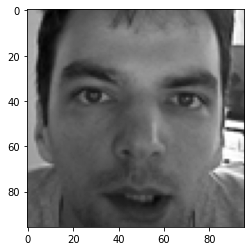

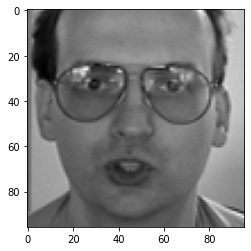

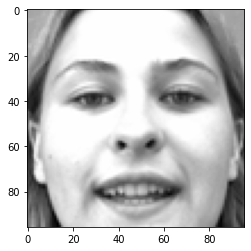

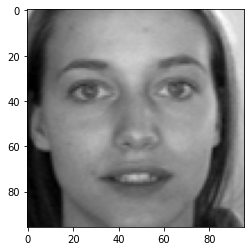

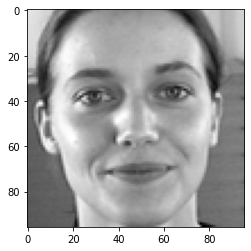

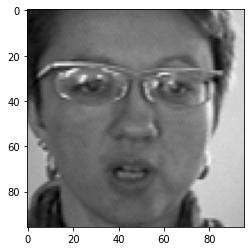

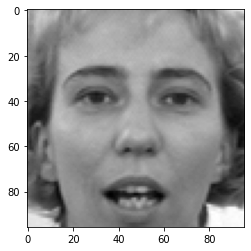

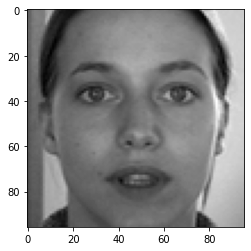

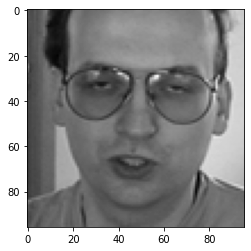

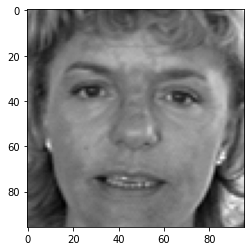

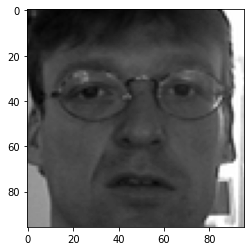

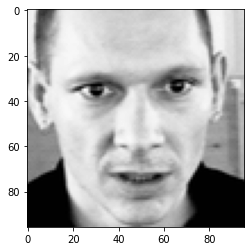

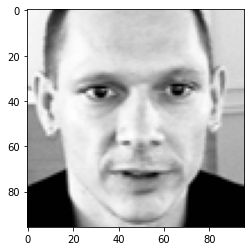

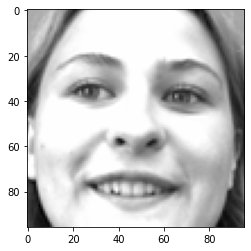

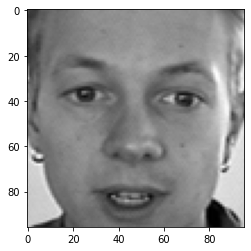

In [290]:
for x in range(20):
 plt.imshow(image[x].reshape(96,96),cmap='gray')
 plt.show()

In [103]:
features = data.drop('Image',axis=1)
features.head()
len(features)

7049

In [223]:
y = []
for f in range(len(features)):
 fe = features.iloc[f,:]
 y.append(fe)

In [298]:
y = np.asarray(y,dtype=np.uint8)

In [299]:
y[0]

array([66, 39, 30, 36, 59, 39, 73, 39, 36, 37, 23, 37, 56, 29, 80, 32, 40,
       29, 16, 29, 44, 57, 61, 79, 28, 77, 43, 72, 43, 84], dtype=uint8)

In [226]:
y[0][0::2],y[0][1::2]

(array([66.03356391, 30.22700752, 59.58207519, 73.13034586, 36.35657143,
        23.45287218, 56.95326316, 80.22712782, 40.22760902, 16.35637895,
        44.42057143, 61.19530827, 28.61449624, 43.3126015 , 43.13070677]),
 array([39.00227368, 36.4216782 , 39.64742256, 39.96999699, 37.3894015 ,
        37.3894015 , 29.03364812, 32.22813835, 29.0023218 , 29.64747068,
        57.06680301, 79.97016541, 77.38899248, 72.93545865, 84.48577444]))

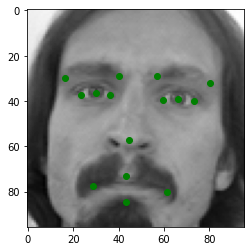

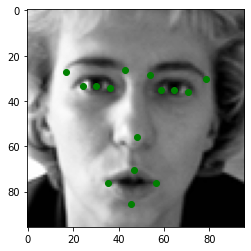

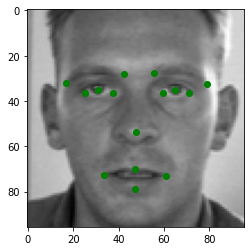

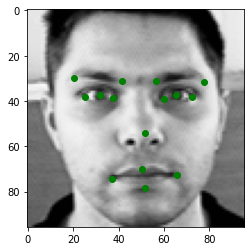

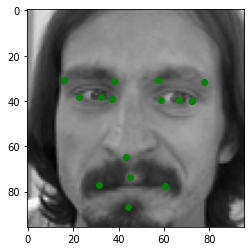

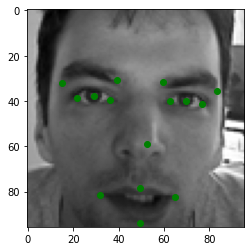

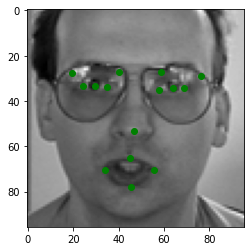

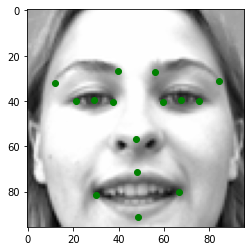

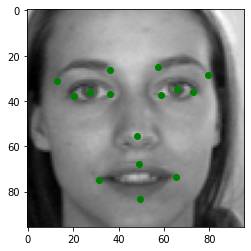

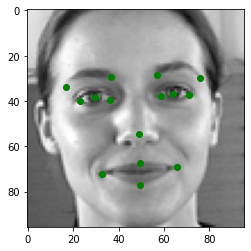

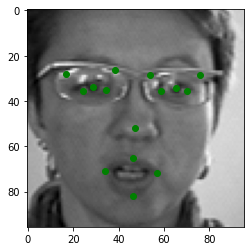

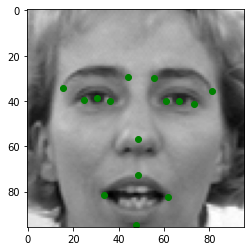

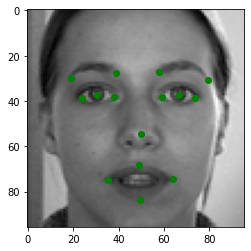

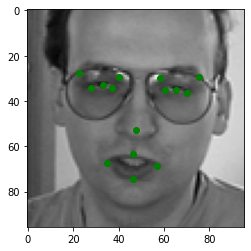

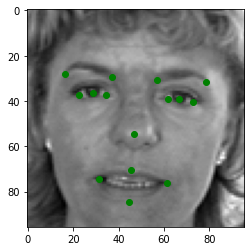

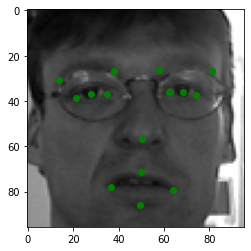

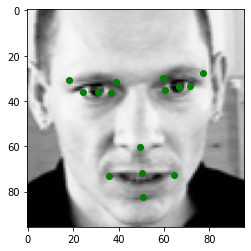

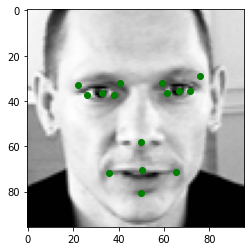

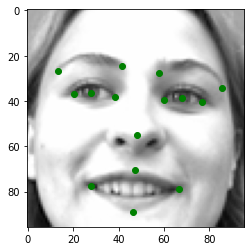

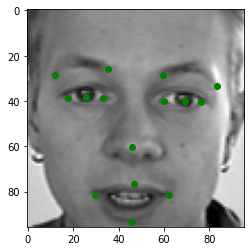

In [275]:
for im in range(20):
  res = y[im]
  plt.imshow(image[im].reshape(96,96),cmap='gray')
  plt.plot(res[0::2], res[1::2],'ro', color='green')
  plt.show()

In [300]:
print("keypoints len : "+str(len(y))+" / keypoints shape: "+str(y.shape))
print("Images len : "+str(len(image))+" / Images shape: "+str(image.shape))

keypoints len : 7049 / keypoints shape: (7049, 30)
Images len : 7049 / Images shape: (7049, 96, 96, 1)


In [301]:
x_train,x_test,y_train,y_test = train_test_split(image,y,test_size=0.3,random_state=42)

In [302]:
model = Sequential()
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_125 (LeakyReLU)  (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_125 (Bat (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_126 (LeakyReLU)  (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_126 (Bat (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 48, 48, 32)      

In [303]:
model.compile(optimizer='Adam',loss='mse',metrics=['mae','accuracy'])

In [305]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
155/155 [==============================] - 15s 97ms/step - loss: 190.2562 - mae: 8.5002 - accuracy: 0.8381 - val_loss: 228.3441 - val_mae: 9.7004 - val_accuracy: 0.7541
Epoch 2/50
155/155 [==============================] - 15s 94ms/step - loss: 163.8536 - mae: 7.4456 - accuracy: 0.8486 - val_loss: 312.4280 - val_mae: 12.6324 - val_accuracy: 0.7626
Epoch 3/50
155/155 [==============================] - 15s 94ms/step - loss: 138.8031 - mae: 6.6085 - accuracy: 0.8377 - val_loss: 168.9270 - val_mae: 7.4219 - val_accuracy: 0.8704
Epoch 4/50
155/155 [==============================] - 15s 94ms/step - loss: 116.3760 - mae: 5.7908 - accuracy: 0.8421 - val_loss: 239.2876 - val_mae: 7.0133 - val_accuracy: 0.8704
Epoch 5/50
155/155 [==============================] - 15s 94ms/step - loss: 107.8851 - mae: 5.3959 - accuracy: 0.8373 - val_loss: 226.9569 - val_mae: 8.3709 - val_accuracy: 0.8331
Epoch 6/50
155/155 [==============================] - 15s 94ms/step - loss: 84.4768 - mae: 4.6911 -

In [322]:
test_data = pd.read_csv("test.csv")
test_image = []
for i in range(len(test_data['Image'])):
  img = np.array(data['Image'][i].split(' '),dtype=np.uint8).reshape(-1,96,96,1)
  test_image.append(img)

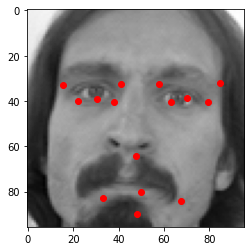

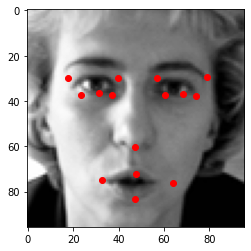

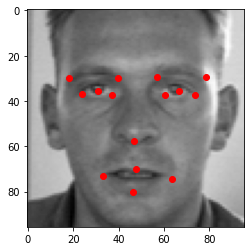

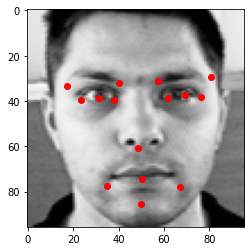

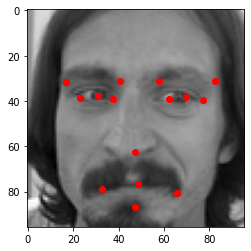

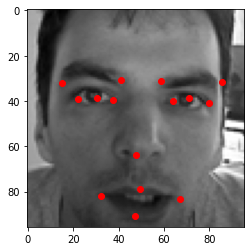

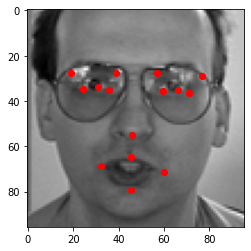

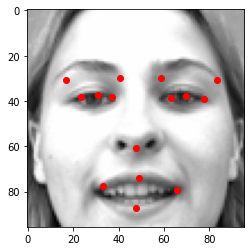

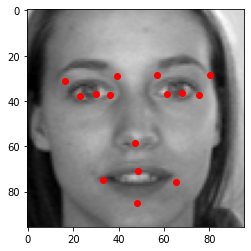

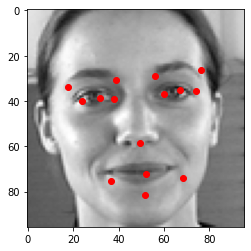

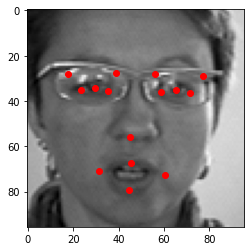

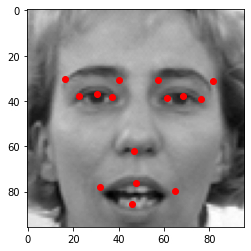

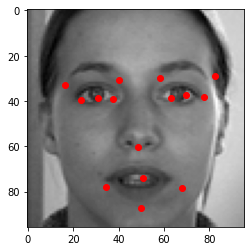

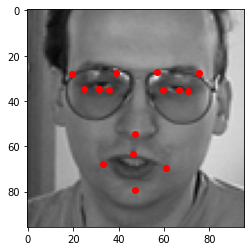

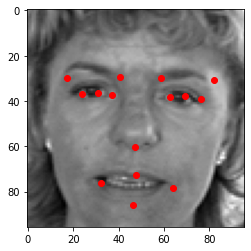

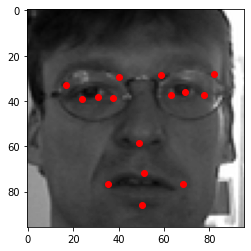

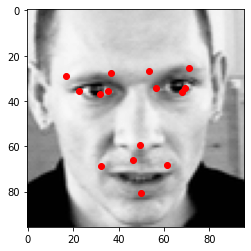

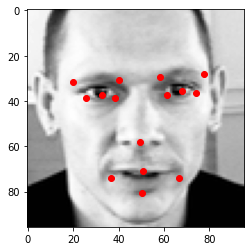

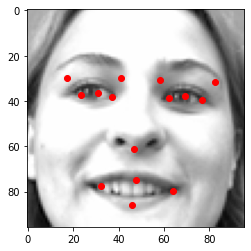

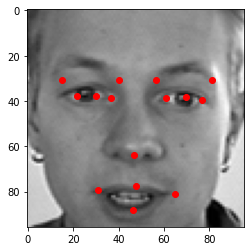

In [337]:
for i in range(20):
 predicts = model.predict(test_image[i])
 x = predicts[0][0::2]
 y = predicts[0][1::2]
 plt.imshow(test_image[i].reshape(96,96),cmap='gray')
 plt.plot(x,y,'ro')
 plt.show()